1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [35]:
import pandas as pd

file_path = 'data/2023_6/open_rank_20236.csv' 
df = pd.read_csv(file_path)

top_100 = df[df['rank'] <= 100]

max_value = top_100['value'].max()
min_value = top_100['value'].min()
mean_value = top_100['value'].mean()
median_value = top_100['value'].median()

print(f"最大值: {max_value}")
print(f"最小值: {min_value}")
print(f"均值: {mean_value}")
print(f"中位数: {median_value}")


最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [36]:
import pandas as pd
df = pd.read_csv('data/2022/activity_2022.csv')

growth_rate_columns = [f"2022{i}_value" for i in range(1, 13)]  
growth_rates = []


for index, row in df.iterrows():
    rates = []
    for i in range(1, 12): 
        current_value = row[growth_rate_columns[i]]
        previous_value = row[growth_rate_columns[i - 1]]
        growth_rate = (current_value - previous_value) / previous_value
        rates.append(growth_rate)
    growth_rates.append(rates)

growth_rate_columns_new = [f"增长率_{i}" for i in range(1, 12)]
df[growth_rate_columns_new] = pd.DataFrame(growth_rates)

df['平均增长率'] = df[growth_rate_columns_new].mean(axis=1)

print(df[['repo', '平均增长率']])



                                     repo     平均增长率
0                MicrosoftDocs/azure-docs -0.017928
1                           NixOS/nixpkgs  0.000295
2                          dotnet/runtime -0.022848
3                          elastic/kibana -0.003651
4  firstcontributions/first-contributions  0.140824
5                         flutter/flutter -0.012404
6                     home-assistant/core  0.008453
7                        microsoft/vscode  0.022905
8                         pytorch/pytorch  0.013160
9                          rust-lang/rust -0.003778


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [37]:
import pandas as pd

china_file_path = 'data/2022/china_2022.csv' 
global_file_path = 'data/2022/global_2022.csv'

china_df = pd.read_csv(china_file_path)
global_df = pd.read_csv(global_file_path)

metrics = ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 
        'merged_pull', 'rank', 'value', 'rankDelta', 'valueDelta']

china_stats = china_df[metrics].describe().transpose()
global_stats = global_df[metrics].describe().transpose()

comparison = china_stats[['mean', '50%', 'min', 'max']].rename(columns={
    'mean': 'China_Mean',
    '50%': 'China_Median',
    'min': 'China_Min',
    'max': 'China_Max'
}).join(global_stats[['mean', '50%', 'min', 'max']].rename(columns={
    'mean': 'Global_Mean',
    '50%': 'Global_Median',
    'min': 'Global_Min',
    'max': 'Global_Max'
}))

print(comparison)


                China_Mean  China_Median  China_Min  China_Max  Global_Mean  \
issue_comment    61205.500     39141.000   11741.00  167814.00   341409.400   
open_issue        9169.200      6889.500     752.00   22397.00    43300.200   
open_pull        16912.700     15953.000    1823.00   35266.00    83423.000   
review_comment   19857.500     10851.000    2113.00   60402.00   120392.100   
merged_pull      13764.100     13705.500    1165.00   26732.00    62472.000   
rank                 5.500         5.500       1.00      10.00        5.500   
value            40269.534     29789.235   12033.71  103368.49   215855.491   
rankDelta            5.300         0.000       0.00      25.00        0.100   
valueDelta        9265.007      9882.000    2329.36   21093.11    11906.921   

                Global_Median  Global_Min  Global_Max  
issue_comment      178629.000    78530.00  1437317.00  
open_issue          21648.000    13162.00   189185.00  
open_pull           49103.500    27414.00

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

# 解：
###  计算 P(HTML/Markdown)

总概率  P(HTML/Markdown)  可以通过全概率公式计算：

$$
P(\text{HTML/Markdown}) = P(\text{HTML/Markdown} | \text{非软件型}) \cdot P(\text{非软件型}) + P(\text{HTML/Markdown} | \text{软件型}) \cdot P(\text{软件型})
$$

代入数值：

$$
P(\text{HTML/Markdown}) = (0.85 \cdot 0.25) + (0.10 \cdot 0.75)
$$

$$
P(\text{HTML/Markdown}) = 0.2125 + 0.075 = 0.2875
$$



###  计算 P(非软件型 | HTML/Markdown)

现在使用贝叶斯定理：

$$
P(\text{非软件型} | \text{HTML/Markdown}) = \frac{(0.85 \cdot 0.25)}{0.2875} = \frac{0.2125}{0.2875} \approx 0.738
$$



### 答：
给定一个项目带有 HTML/Markdown 标签，它是 **非软件型项目** 的概率大约是 **73.8%**。


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

# 解：
 工具组件型项目占比 50%：
   $$
   P(\text{工具组件型}) = 0.5
   $$
 非工具组件型项目中，JavaScript 语言的项目占比 10%，而工具组件型项目中，JavaScript 语言的项目占比 35%：
   $$
   P(\text{JavaScript} | \text{工具组件型}) = 0.35
   $$
   $$
   P(\text{JavaScript} | \text{非工具组件型}) = 0.10
   $$
   因此，非工具组件型项目占比为 50%：
   $$
   P(\text{非工具组件型}) = 0.5
   $$


### 计算 P(JavaScript)
使用全概率公式计算  P(JavaScript)：

$$
P(\text{JavaScript}) = P(\text{JavaScript} | \text{工具组件型}) \cdot P(\text{工具组件型}) + P(\text{JavaScript} | \text{非工具组件型}) \cdot P(\text{非工具组件型})
$$

代入数值：

$$
P(\text{JavaScript}) = (0.35 \cdot 0.5) + (0.10 \cdot 0.5)
$$

$$
P(\text{JavaScript}) = 0.175 + 0.05 = 0.225
$$



### 使用贝叶斯定理计算 P(工具组件型 | JavaScript)
现在使用贝叶斯定理：

$$
P(\text{工具组件型} | \text{JavaScript}) = \frac{P(\text{JavaScript} | \text{工具组件型}) \cdot P(\text{工具组件型})}{P(\text{JavaScript})}
$$

代入数值：

$$
P(\text{工具组件型} | \text{JavaScript}) = \frac{(0.35 \cdot 0.5)}{0.225} = \frac{0.175}{0.225} \approx 0.778
$$


### 答：
给定一个项目是由 **JavaScript** 语言编写的，它是 **工具组件型项目** 的概率大约是 **77.8%**。


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

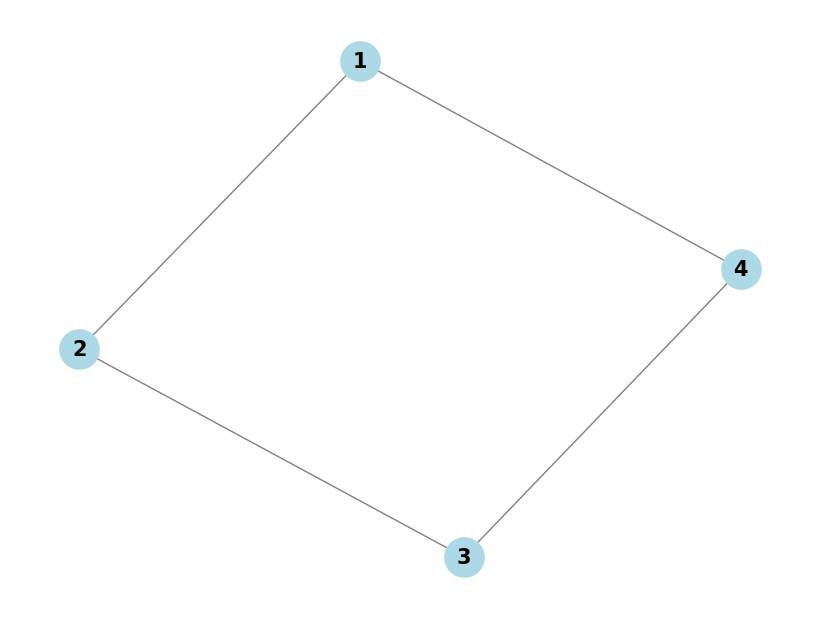

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

user = [1, 2, 3, 4]
G.add_nodes_from(user)

edge = [(1, 2), (2, 3), (3, 4), (4, 1)]
G.add_edges_from(edge)


plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_size=15, font_weight='bold', edge_color='gray')
plt.show()


7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

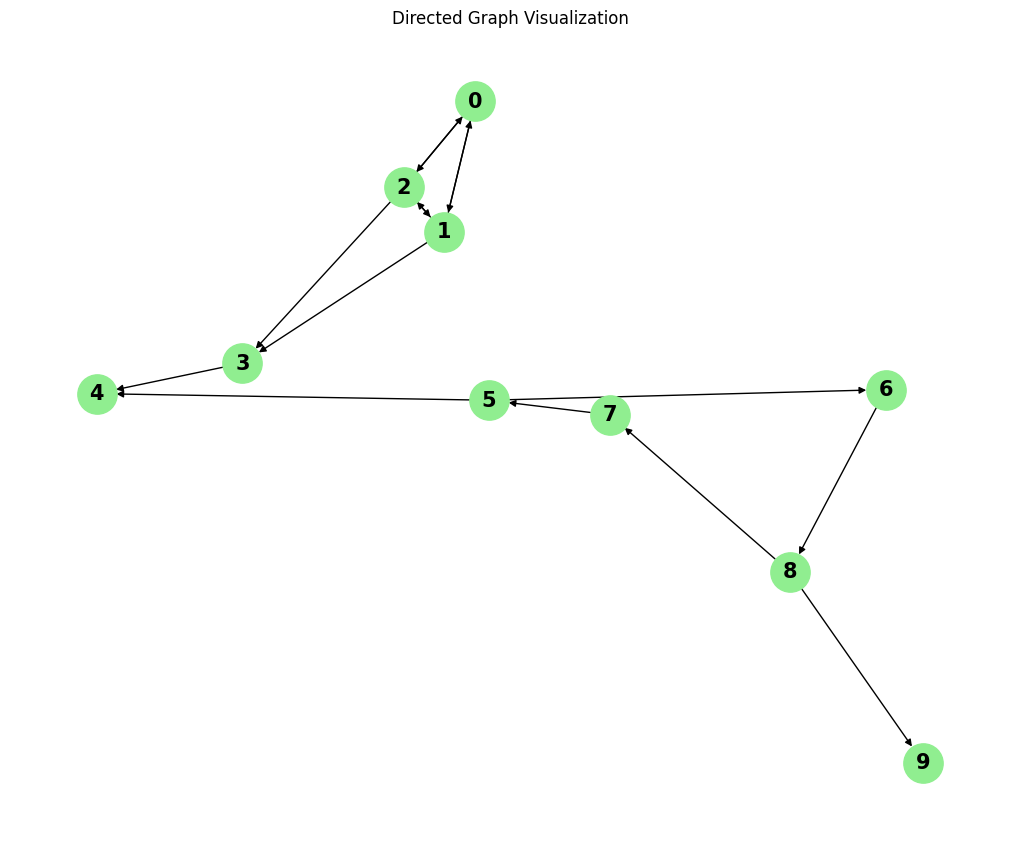

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)

edges = [
    (0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
    (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
    (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)
]
G.add_edges_from(edges)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=800, font_size=15, font_weight='bold', arrows=True)
plt.title("Directed Graph Visualization")
plt.show()


8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

Node 0: PageRank = 0.0950
Node 1: PageRank = 0.1055
Node 2: PageRank = 0.1055
Node 3: PageRank = 0.0950
Node 4: PageRank = 0.1593
Node 5: PageRank = 0.1020
Node 6: PageRank = 0.0786
Node 7: PageRank = 0.0786
Node 8: PageRank = 0.1020
Node 9: PageRank = 0.0786


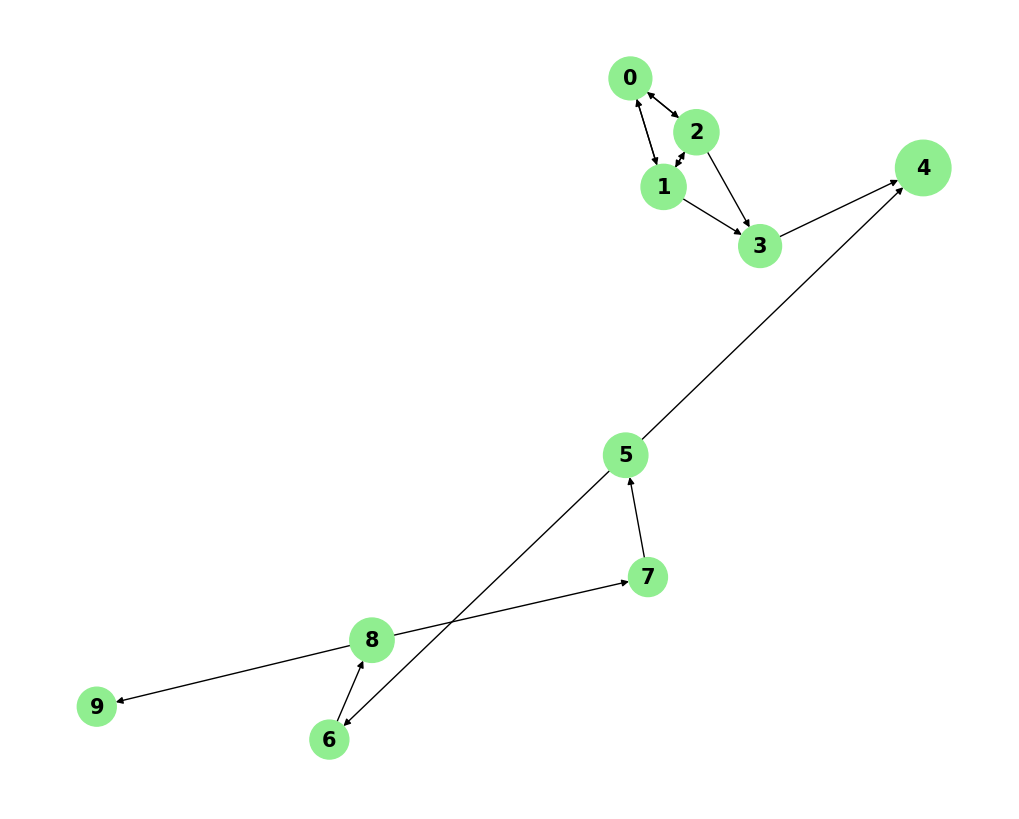

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)

edges = [
    (0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
    (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
    (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)
]
G.add_edges_from(edges)

pagerank_values = nx.pagerank(G)
for node, value in pagerank_values.items():
    print(f"Node {node}: PageRank = {value:.4f}")
plt.figure(figsize=(10, 8))
node_sizes = [v * 10000 for v in pagerank_values.values()] 
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=node_sizes, font_size=15, font_weight='bold', arrows=True)
plt.show()
